**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [46]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,high school,0,1,0,0


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [6]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [9]:
X_train.shape,X_test.shape

((21331, 17), (5333, 17))

In [10]:
X_train

array([[120000,      2,      2, ...,      0,   3107,   8542],
       [190000,      1,      1, ...,  10091,  20000,  10000],
       [420000,      2,      1, ...,   3034,   3012,   5012],
       ...,
       [ 30000,      2,      1, ...,   1434,      0,   1581],
       [150000,      3,      2, ...,      0,      0,      0],
       [360000,      1,      2, ...,   2562,     13,   2989]])

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [13]:
parameters = {'max_depth' : [3,6,9,12],
              'n_estimators' : [10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [16]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [17]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [20]:
gs_df = pd.DataFrame(gs.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.239389,0.018930,0.007306,0.000328,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819269,0.816925,0.824426,0.815284,0.818058,0.003590,11
1,1.097590,0.013429,0.029494,0.004164,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.815284,0.814346,0.820206,0.813408,0.815058,0.002788,15
2,2.139576,0.020501,0.052786,0.004424,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812705,0.813408,0.820441,0.810830,0.813605,0.003580,16
3,4.323406,0.022738,0.103757,0.003387,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811577,0.815518,0.814346,0.821378,0.813408,0.815246,0.003326,14
4,0.366379,0.003558,0.008054,0.000477,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.818565,0.819972,0.826301,0.819503,0.819746,0.003825,10
5,1.809329,0.019520,0.031460,0.000313,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815561,0.819034,0.819737,0.826067,0.820206,0.820121,0.003390,8
6,3.602173,0.030248,0.064049,0.004763,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.819972,0.819503,0.827004,0.820206,0.820496,0.003628,3
7,7.310087,0.056957,0.123005,0.006405,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815796,0.819972,0.819269,0.826770,0.820675,0.820496,0.003557,3
8,0.503543,0.005171,0.009001,0.000100,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.809702,0.815987,0.819972,0.824895,0.816221,0.817355,0.005008,12
9,2.527396,0.034338,0.038910,0.002120,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.815796,0.818565,0.819503,0.826301,0.819972,0.820027,0.003455,9


**Find the best hyperparameters from the cross-validation.**

In [24]:
gs.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [25]:
gs.best_score_

0.8207774511287191

In [60]:
gs.cv_results_

{'mean_fit_time': array([ 0.23938875,  1.09758954,  2.13957586,  4.32340589,  0.36637893,
         1.80932918,  3.60217261,  7.31008682,  0.50354328,  2.52739615,
         4.98573227,  9.97064328,  0.62424049,  3.08700247,  6.15609918,
        11.98392906]),
 'mean_score_time': array([0.00730634, 0.02949357, 0.05278563, 0.10375705, 0.0080543 ,
        0.03146005, 0.06404891, 0.12300501, 0.00900111, 0.03891015,
        0.07364182, 0.14743423, 0.01084542, 0.04568992, 0.09231601,
        0.17273607]),
 'mean_test_score': array([0.8180584 , 0.81505804, 0.81360475, 0.81524559, 0.81974616,
        0.82012116, 0.82049621, 0.82049621, 0.81735538, 0.82002739,
        0.82026178, 0.82054312, 0.81721443, 0.82049614, 0.82049621,
        0.82077745]),
 'param_max_depth': masked_array(data=[3, 3, 3, 3, 6, 6, 6, 6, 9, 9, 9, 9, 12, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
      

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [65]:
# Create a 5x5 grid
test_scores=[]
max_depth : [3,6,9,12]
n_estimators : [10,50,100,200]
for i in n_estimators:
    for j in max_depth:
        rf = RandomForestClassifier(n_estimators=i,max_depth=j).fit(X_train, y_train)
        a=rf.score(X_test,y_test)
        test_scores.append([i,j,a])

In [66]:
# Set color map to `plt.cm.jet`
print(test_scores)

[[10, 3, 0.8166135383461466], [10, 6, 0.8214888430526908], [10, 9, 0.8209263078942434], [10, 12, 0.8124882805175323], [50, 3, 0.7995499718732421], [50, 6, 0.8209263078942434], [50, 9, 0.8196137258578661], [50, 12, 0.8181136321020064], [100, 3, 0.8160510031876992], [100, 6, 0.8209263078942434], [100, 9, 0.8214888430526908], [100, 12, 0.8184886555409713], [200, 3, 0.8106131633227077], [200, 6, 0.8211138196137259], [200, 9, 0.8201762610163135], [200, 12, 0.820363772735796]]


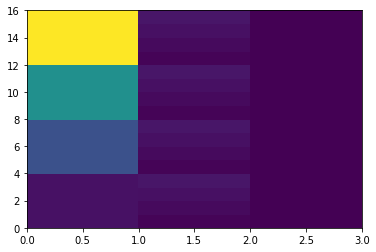

In [67]:
# Visualize pcolormesh
plt.pcolormesh(test_scores)

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [68]:
# Create a dataframe of the feature names and importance
df.corr()['default payment next month']

LIMIT_BAL                    -0.154423
SEX                          -0.039945
EDUCATION                     0.034966
MARRIAGE                     -0.026030
AGE                           0.014334
PAY_1                         0.325365
PAY_2                         0.263649
PAY_3                         0.238085
PAY_4                         0.219889
PAY_5                         0.204948
PAY_6                         0.190182
BILL_AMT1                    -0.020508
BILL_AMT2                    -0.014579
BILL_AMT3                    -0.014649
BILL_AMT4                    -0.011349
BILL_AMT5                    -0.006753
BILL_AMT6                    -0.006274
PAY_AMT1                     -0.072431
PAY_AMT2                     -0.061555
PAY_AMT3                     -0.058010
PAY_AMT4                     -0.054572
PAY_AMT5                     -0.056651
PAY_AMT6                     -0.054838
default payment next month    1.000000
graduate school              -0.049595
high school              

In [69]:
gs.best_estimator_.feature_importances_

array([0.0598768 , 0.01245122, 0.00781853, 0.04287095, 0.30459238,
       0.05397308, 0.05202858, 0.04863935, 0.04617078, 0.04306215,
       0.04571771, 0.0605955 , 0.05169707, 0.04825381, 0.04249536,
       0.03998141, 0.03977532])

In [70]:
df_new = pd.DataFrame({'Feature name':features_response[:-1],
                      'Importance':gs.best_estimator_.feature_importances_})

In [71]:
# Sort values by importance
df_new.sort_values('Importance',ascending=False)

,Feature name,Importance
4,PAY_1,0.304592
11,PAY_AMT1,0.060596
0,LIMIT_BAL,0.059877
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
12,PAY_AMT2,0.051697
7,BILL_AMT3,0.048639
13,PAY_AMT3,0.048254
8,BILL_AMT4,0.046171
10,BILL_AMT6,0.045718
